# iNeuron Internship 


# Submitted by-Shubham Sharma
<br>Project Title: Amazon Sales Data Analysis
<br>Technologies: Business Intelligence
<br>domanin: E-commerce
<br>Difficulty Level: Advanced

# PROBLEM STATEMENT
Sales management has gained importance to meet increasing and the need for imporoved methods of distribution to reduce cost and
to increase profits.Sales management today is the most importent function in a commercial and business enterprise.



DO ETL: : Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month wise , year wise , yearly_month wise

find key metrics and factors and show the meaningful relationships between attributes.

# DATA COLLECTION
Dataset taken from iNeuron Portal Link:- https://docs.google.com/spreadsheets/d/1_Wug1z8T3IN1GK5kNXUIbo7CWNK6ZkQq/edit?usp=drive_link

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#import data
sales = pd.read_excel("SALESDATA.xlsx")

In [3]:
sales.head(10)

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,@dropdown,Unnamed: 21
0,10000481,2017-04-30,-237.910,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.000,...,237.91,0.000,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.790,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.960,...,456.17,824.960,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.730,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.660,...,438.93,548.660,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.750,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.000,...,211.75,0.000,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.940,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.520,...,89248.66,185876.600,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons
5,10004516,2017-05-30,-1950.000,2017-05-30,103610,NaN,NaN,Best Choice Fudge Brownies,2000,0.000,...,1950.00,0.000,0.0,1950.00,1950.000000,1,124,EA,NaN,NaN
6,10007866,2017-09-03,371.014,2017-09-03,100403,P01,20910,Moms Sliced Turkey,2000,795.314,...,424.30,795.314,0.0,424.30,424.300000,1,149,EA,NaN,PR = pair
7,10009356,2017-06-18,608.080,2017-06-18,105481,P01,62550,Tell Tale Garlic,29000,575.000,...,541.92,1150.000,0.0,541.92,270.960000,2,103,EA,NaN,NaN
8,10009356,2017-06-18,424.800,2017-06-18,105481,P01,60794,High Top Walnuts,18000,51.880,...,353.40,778.200,0.0,353.40,23.560000,15,103,EA,NaN,NaN
9,10009356,2017-06-18,13492.800,2017-06-18,105481,P01,36001,Big Time Frozen Cheese Pizza,9000,412.030,...,11229.00,24721.800,0.0,11229.00,187.150000,60,103,EA,NaN,NaN


In [4]:
#checking the shape
sales.shape

(65282, 22)

Observation: We have a total of 65,282 rows and 22 columns in the dataset

In [5]:
#columns name 
sales.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M', '@dropdown', 'Unnamed: 21'],
      dtype='object')

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

Observation : The names and the datatypes of the coulmns in the dataset.

In [8]:
#checking for any missing values
sales.isnull().sum()

CustKey                                 0
DateKey                                 0
Discount Amount                         2
Invoice Date                            0
Invoice Number                          0
Item Class                           8289
Item Number                            41
Item                                    0
Line Number                             0
List Price                              0
Order Number                            0
Promised Delivery Date                  0
Sales Amount                            0
Sales Amount Based on List Price        0
Sales Cost Amount                       0
Sales Margin Amount                     0
Sales Price                             1
Sales Quantity                          0
Sales Rep                               0
U/M                                     0
@dropdown                           65282
Unnamed: 21                         65278
dtype: int64

<Axes: >

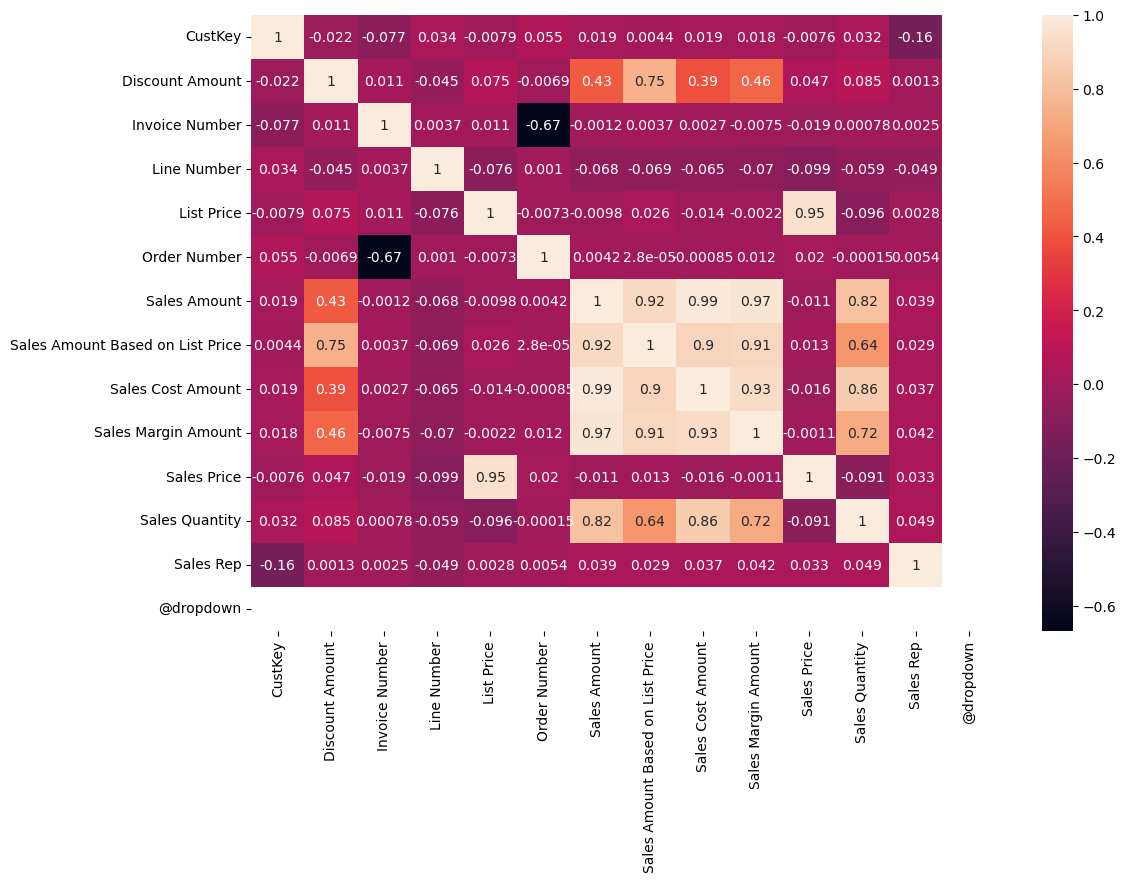

In [9]:
#checking the correlation

plt.figure(figsize=(12,8))
sns.heatmap(sales.corr(),annot=True)

Observation 
- Discount Amount is highly related to Sales Amount,Sales Cost Amount,Sales Amount based on list price & Sales Margin Amount and moderately related to Sales Quaninity
- List Price highly realted to sales price and has no relations with Sales Amount, SAles cost amount, Sales amount based on list price & sales margin amount
- Sales quantity is moderately related to Sales amount, discount amount, sales margin amount.
- Their is no realtion between Sales Rep and Sales Amount, Sales Margin Amount.

In [10]:
sales.Item.value_counts()

Better Fancy Canned Sardines    1648
Ebony Prepared Salad            1471
Moms Sliced Turkey              1192
Imagine Popsicles               1191
Discover Manicotti              1126
                                ... 
Fast Salted Pretzels               1
Great Bagels                       1
Imagine Frozen Cauliflower         1
Jeffers Corn Puffs                 1
Bravo Fancy Canned Sardines        1
Name: Item, Length: 657, dtype: int64

Observation: Highest number of sold item in **better Fancy Canned Sardiness**

Top 5 selling items:
- Better Fancy Canned sardiness
- Ebony Prepared Salad
- Moms Sliced Turkey 
- Imagine Popsicles
- Discover Manicotti

In [11]:
sales.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,@dropdown
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000,0.0
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398,NaN
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936,NaN
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000,NaN
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000,NaN
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000,NaN
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000,NaN
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000,NaN


In [12]:
sales[['List Price', 'Sales Price','Sales Amount Based on List Price','Sales Amount','Discount Amount']].head(20)

,List Price,Sales Price,Sales Amount Based on List Price,Sales Amount,Discount Amount
0,0.0000,237.910000,0.0000,237.91,-237.9100
1,824.9600,456.170000,824.9600,456.17,368.7900
2,548.6600,438.930000,548.6600,438.93,109.7300
3,0.0000,211.750000,0.0000,211.75,-211.7500
4,408.5200,196.150901,185876.6000,89248.66,96627.9400
5,0.0000,1950.000000,0.0000,1950.00,-1950.0000
6,795.3140,424.300000,795.3140,424.30,371.0140
7,575.0000,270.960000,1150.0000,541.92,608.0800
8,51.8800,23.560000,778.2000,353.40,424.8000
9,412.0300,187.150000,24721.8000,11229.00,13492.8000


# Observation
Dicount Amount: =(Sales Amount Based on List Price-Sales Amount)

In [21]:
#finding null values in the dataset
sales.isnull().sum()

CustKey                                 0
DateKey                                 0
Discount Amount                         2
Invoice Date                            0
Invoice Number                          0
Item Class                           8289
Item Number                            41
Item                                    0
Line Number                             0
List Price                              0
Order Number                            0
Promised Delivery Date                  0
Sales Amount                            0
Sales Amount Based on List Price        0
Sales Cost Amount                       0
Sales Margin Amount                     0
Sales Price                             1
Sales Quantity                          0
Sales Rep                               0
U/M                                     0
@dropdown                           65282
Unnamed: 21                         65278
dtype: int64

In [23]:
#finding unique values in Item Class cloumn
sales['Item Class'].unique()

array([nan, 'P01', 'PO1'], dtype=object)

In [24]:
#removing null values from the dataset

sales.dropna(subset=['Discount Amount','Sales Price','Item Number'],inplace=True)

In [26]:
#Generating descriptive statistics
sales.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,@dropdown
count,6.524100e+04,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,65241.000000,0.0
mean,1.001770e+07,1857.310923,216292.785242,23725.043178,515.016834,180567.610122,2853.121051,4710.431974,1662.023052,1191.097999,283.250283,45.106712,137.421422,NaN
std,7.175846e+03,9039.535784,94982.018695,32669.565014,449.144896,67612.238675,15169.020896,20702.609533,9559.396917,5862.566647,250.448615,429.793733,26.644271,NaN
min,1.000045e+07,-255820.800000,100034.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,0.337341,1.000000,103.000000,NaN
25%,1.001272e+07,246.280000,117969.000000,3000.000000,181.560000,115281.000000,308.310000,561.040000,167.810000,129.890000,100.030000,2.000000,113.000000,NaN
50%,1.001966e+07,442.200000,222904.000000,12000.000000,325.190000,203695.000000,553.940000,999.750000,304.580000,246.480000,183.282857,3.000000,134.000000,NaN
75%,1.002351e+07,1001.500000,314325.000000,32000.000000,803.860000,218576.000000,1279.750000,2321.400000,688.550000,578.220000,448.220000,8.000000,160.000000,NaN
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000,NaN


In [35]:
#Creating Year,Month,Quarter Day Columns in Sales_data01
sales['Invoice_Year'] = sales['Invoice Date'].dt.year
sales['Invoice_Month'] = sales['Invoice Date'].dt.month
sales['Invoice_Quarter'] = sales['Invoice Date'].dt.quarter
sales['Invoice_day'] = sales['Invoice Date'].dt.day

In [36]:
sales

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,@dropdown,Unnamed: 21,Invoice_Year,Invoice_Month,Invoice_Quarter,Invoice_day,Invoice Year,Invoice Month,Invoice Quarter,Invoice day
1,10002220,2017-07-14,368.790,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.960,...,NaN,NaN,2017,7,3,14,2017,7,3,14
2,10002220,2017-10-17,109.730,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.660,...,NaN,EA = each,2017,10,4,17,2017,10,4,17
4,10004516,2017-05-27,96627.940,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.520,...,NaN,SE = some SI unit like kgs or gallons,2017,5,2,27,2017,5,2,27
6,10007866,2017-09-03,371.014,2017-09-03,100403,P01,20910,Moms Sliced Turkey,2000,795.314,...,NaN,PR = pair,2017,9,3,3,2017,9,3,3
7,10009356,2017-06-18,608.080,2017-06-18,105481,P01,62550,Tell Tale Garlic,29000,575.000,...,NaN,NaN,2017,6,2,18,2017,6,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65277,10017638,2018-03-21,505.780,2018-03-21,226497,P01,13447,High Top Oranges,8000,119.520,...,NaN,NaN,2018,3,1,21,2018,3,1,21
65278,10017638,2018-03-21,410.750,2018-03-21,226497,P01,25906,Landslide White Sugar,38000,436.780,...,NaN,NaN,2018,3,1,21,2018,3,1,21
65279,10017638,2018-03-21,876.160,2018-03-21,226497,P01,61856,Moms Potato Salad,227001,232.920,...,NaN,NaN,2018,3,1,21,2018,3,1,21
65280,10017638,2018-03-21,24226.770,2018-03-21,226498,P01,17801,Better Fancy Canned Sardines,1000,1431.230,...,NaN,NaN,2018,3,1,21,2018,3,1,21


In [38]:
#calculating yearly sales  
year_sales= sales[['CustKey','Item','Invoice Date','Invoice_Year','Invoice_Quarter','Invoice_Month','Invoice_day','Sales Quantity','Sales Amount Based on List Price','Discount Amount','Sales Amount','Sales Margin Amount','Sales Cost Amount','Sales Rep','U/M','List Price','Sales Price']]

,Invoice_Year,Sales Amount
0,2017,87416407.83
1,2018,20817471.00
2,2019,77906591.65


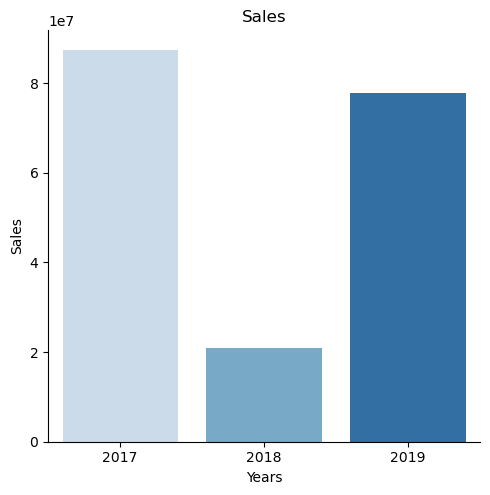

In [45]:
# plotting bar charts on yearly sales 

yearly_sales = sales.groupby('Invoice_Year').sum().reset_index()
sns.catplot(y = 'Sales Amount', x = 'Invoice_Year', data = yearly_sales, palette = 'Blues', kind = "bar")
plt.xlabel('Years')
plt.ylabel('Sales')
plt.title('Sales')
yearly_sales[['Invoice_Year', 'Sales Amount']]

<Axes: xlabel='Invoice_Month', ylabel='Sales Amount'>

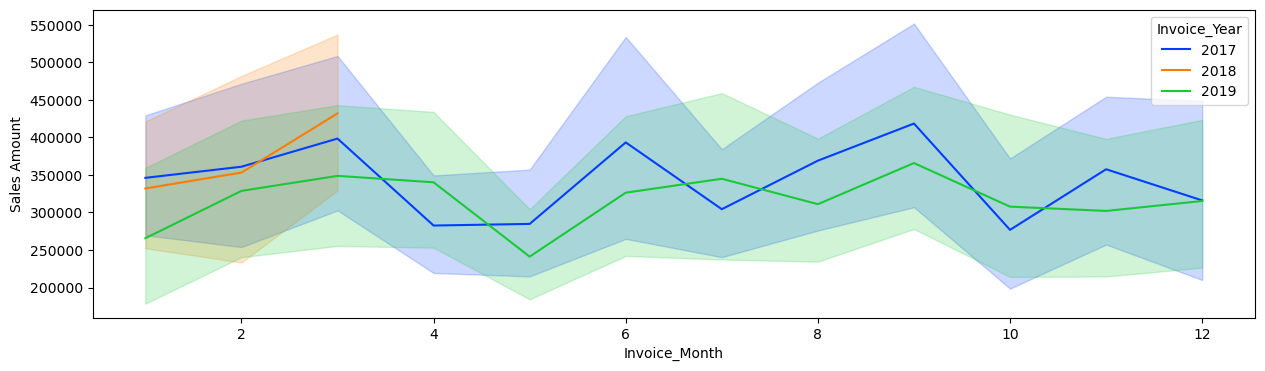

In [47]:
#plotting a line chart to show yearly sales 

plt.figure(figsize = (15,4))
sns.lineplot(y ='Sales Amount', x ='Invoice_Month', data = sales.groupby(['Invoice Date','Invoice_Year','Invoice_Month']).sum(),
             hue = 'Invoice_Year', palette='bright')

Observation: 
From this plot, it is clear that Sales dipped continuosly & then it started to gain from 2018 to 2019

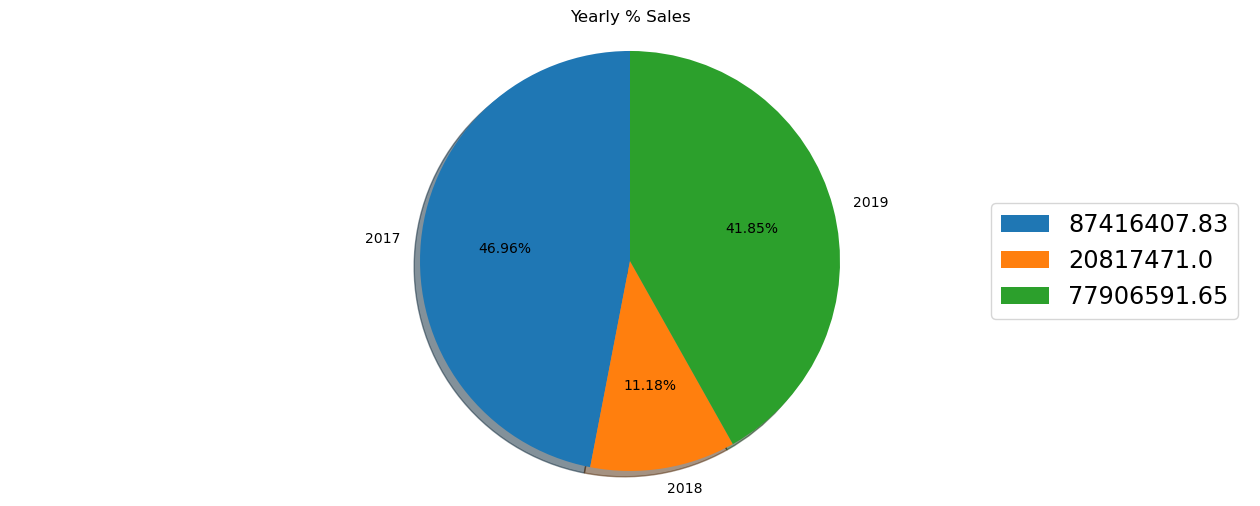

In [48]:
# plotting Piechart to know Sales

plt.figure(figsize=(16,6))
plt.pie('Sales Amount', labels = 'Invoice_Year', data = yearly_sales, autopct = '%1.2f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Yearly % Sales')
plt.legend (round(yearly_sales['Sales Amount'],2), loc = 7, fontsize = 'xx-large')
plt.show()

Observation:
Year 2017 accounted for highest Sales (46.97%), followed by Year 2019 (41.84%)lastly Year 2018 (11.18%)

Text(0, 0.5, 'Count')

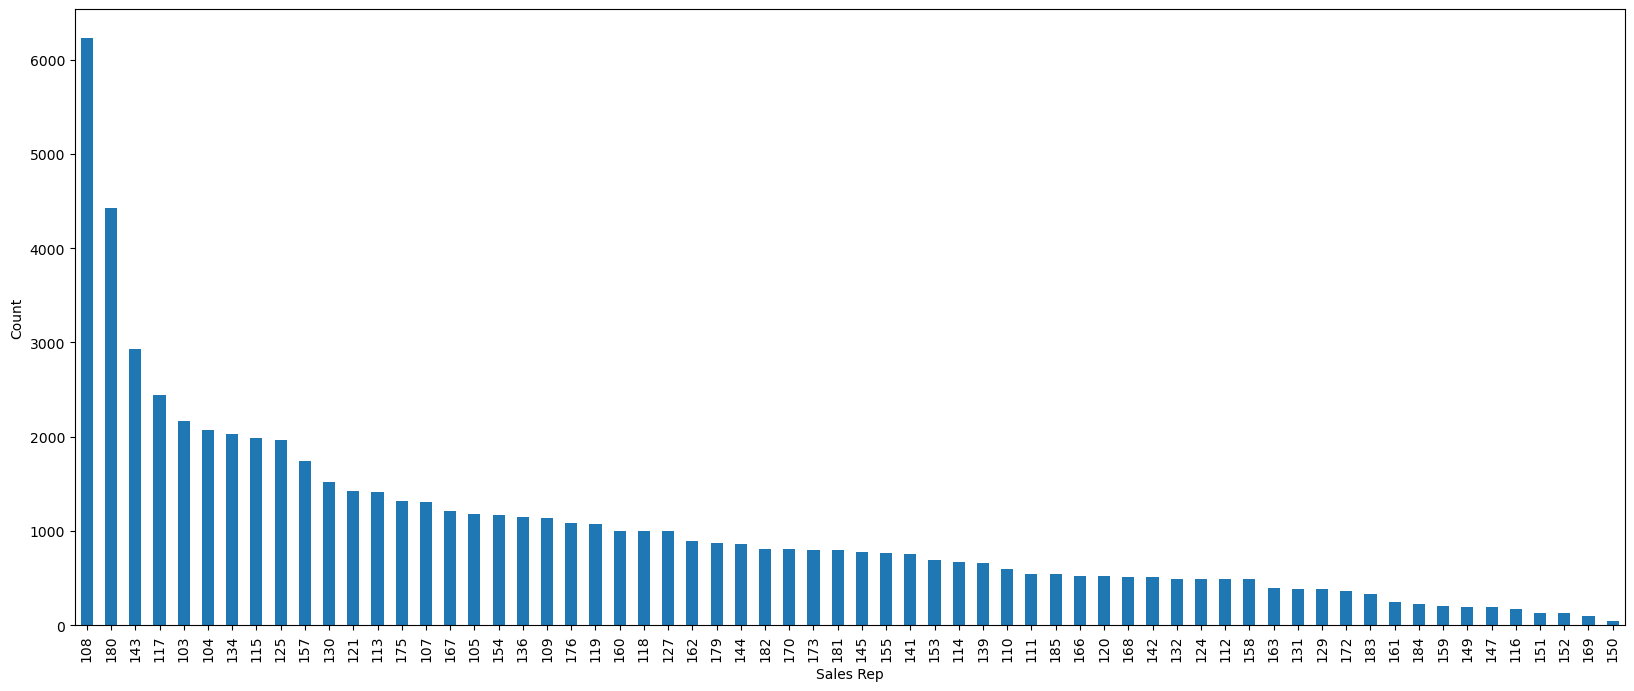

In [49]:
plt.figure(figsize=(20,8))
sales['Sales Rep'].value_counts().plot.bar()
plt.xlabel('Sales Rep')
plt.ylabel('Count')

Observation:
Sales Rep 108 was used the maximum times and Sales Rep 150 was used the minimum.

In [50]:
# Yearly Mothwise records 

yearly_monthwise_sales = sales.groupby(['Invoice_Year','Invoice_Month']).sum().reset_index()
yearly_monthwise_sales.iloc[:,6:].describe()

,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,@dropdown,Invoice_Quarter,Invoice_day,Invoice Year,Invoice Month,Invoice Quarter,Invoice day
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,27.000000,27.000000,27.000000,27.0,27.000000,27.000000,2.700000e+01,27.000000,27.000000,27.000000
mean,1.244452e+06,4.363115e+08,6.894091e+06,1.138197e+07,4.016002e+06,2.878090e+06,684427.100435,108992.851852,332055.962963,0.0,5833.444444,39032.740741,4.876068e+06,15239.037037,5833.444444,39032.740741
std,2.116445e+05,1.760077e+08,1.142842e+06,2.220965e+06,6.506092e+05,5.140723e+05,115921.969853,18098.479315,55275.936829,0.0,3359.045267,7356.573829,8.160036e+05,10241.681133,3359.045267,7356.573829
min,5.042254e+05,1.126185e+08,3.187481e+06,4.900167e+06,1.897292e+06,1.290189e+06,270807.438237,55192.000000,130314.000000,0.0,965.000000,20678.000000,1.948335e+06,965.000000,965.000000,20678.000000
25%,1.143268e+06,2.751391e+08,6.461181e+06,1.077866e+07,3.688586e+06,2.617218e+06,620357.646119,98729.000000,306638.500000,0.0,2599.500000,34253.000000,4.467935e+06,6943.500000,2599.500000,34253.000000
50%,1.259842e+06,4.259476e+08,6.895858e+06,1.152212e+07,4.092856e+06,2.882060e+06,694170.910155,111172.000000,339909.000000,0.0,5460.000000,40544.000000,5.011158e+06,14483.000000,5460.000000,40544.000000
75%,1.365313e+06,5.819396e+08,7.600667e+06,1.278649e+07,4.370919e+06,3.134162e+06,752295.240603,119392.500000,366086.500000,0.0,8326.500000,44622.000000,5.390041e+06,24787.500000,8326.500000,44622.000000
max,1.558636e+06,7.406289e+08,8.783739e+06,1.472000e+07,5.041842e+06,3.807619e+06,873625.957969,138006.000000,404161.000000,0.0,11576.000000,49449.000000,5.942082e+06,34728.000000,11576.000000,49449.000000


Text(1012.5740740740742, 0.5, 'Sales')

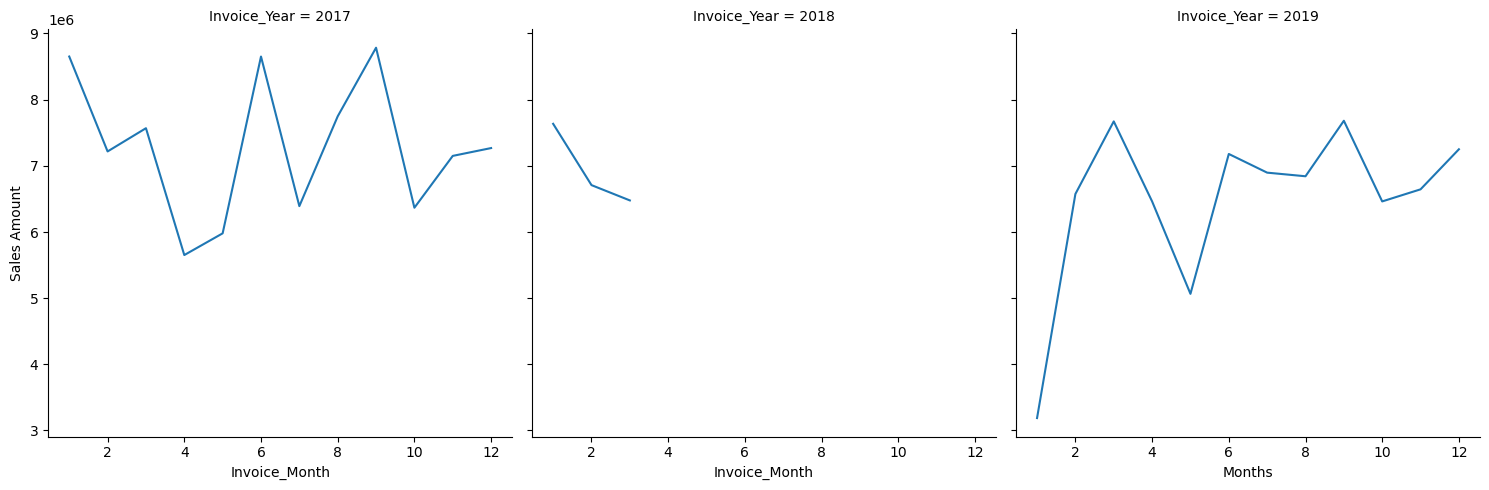

In [51]:
sns.relplot(x = 'Invoice_Month', y ='Sales Amount', data = yearly_monthwise_sales, height = 5, kind = 'line', aspect = 1, col = 'Invoice_Year')
plt.xlabel('Months')
plt.ylabel('Sales')

<Axes: xlabel='Sales Amount', ylabel='Count'>

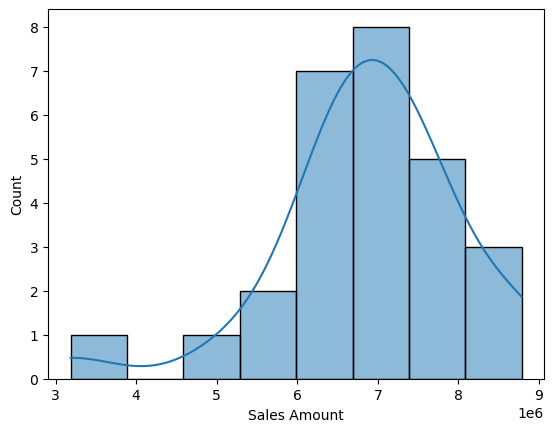

In [52]:
sns.histplot(yearly_monthwise_sales['Sales Amount'], kde = True)

In [54]:
#monthly records 

monthly_sales = sales.groupby(['Invoice_Year','Invoice_Month','Invoice_day']).sum().reset_index()
monthly_sales.iloc[:,5:].describe()

,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,@dropdown,Invoice_Quarter,Invoice Year,Invoice Month,Invoice Quarter,Invoice day
count,5.580000e+02,5.580000e+02,558.000000,5.580000e+02,5.580000e+02,5.580000e+02,558.000000,558.000000,558.000000,558.00000,558.000000,558.0,558.000000,558.000000,558.000000,558.000000,558.000000
mean,2.528881e+07,2.773917e+06,60215.435956,2.111185e+07,3.335851e+05,5.507407e+05,194322.662975,139262.409570,33117.440344,5273.84767,16067.224014,0.0,282.263441,235938.754480,737.372760,282.263441,1888.681004
std,1.726794e+07,2.777574e+06,31763.570671,1.360860e+07,2.299789e+05,3.885589e+05,135882.365942,96929.658407,17114.990036,4780.99002,8029.838008,0.0,212.833210,117247.530726,612.172727,212.833210,1552.624969
min,3.133500e+05,1.200000e+04,2033.880000,3.122850e+05,5.433650e+03,1.084864e+04,3084.290000,2349.360000,1063.117667,56.00000,345.000000,0.0,6.000000,6051.000000,18.000000,6.000000,21.000000
25%,1.295931e+07,1.148752e+06,40386.113325,1.143645e+07,1.573360e+05,2.585411e+05,92438.910000,63142.357500,22154.848425,2118.00000,10068.000000,0.0,124.250000,151891.750000,277.000000,124.250000,731.000000
50%,2.090100e+07,1.921502e+06,54665.030000,1.711255e+07,2.688299e+05,4.537218e+05,150548.000000,113446.860000,30154.046651,3118.00000,14681.500000,0.0,216.000000,224109.000000,569.000000,216.000000,1485.000000
75%,3.403762e+07,3.306756e+06,72573.307400,2.700848e+07,4.696801e+05,7.178838e+05,267013.720000,195474.320000,40993.073432,6581.50000,19665.750000,0.0,372.000000,292465.000000,1011.000000,372.000000,2622.000000
max,1.366703e+08,2.056901e+07,231196.720800,9.413026e+07,1.379283e+06,2.408920e+06,760197.860000,619085.330000,128415.923388,23710.00000,55866.000000,0.0,1341.000000,927820.000000,3443.000000,1341.000000,10580.000000


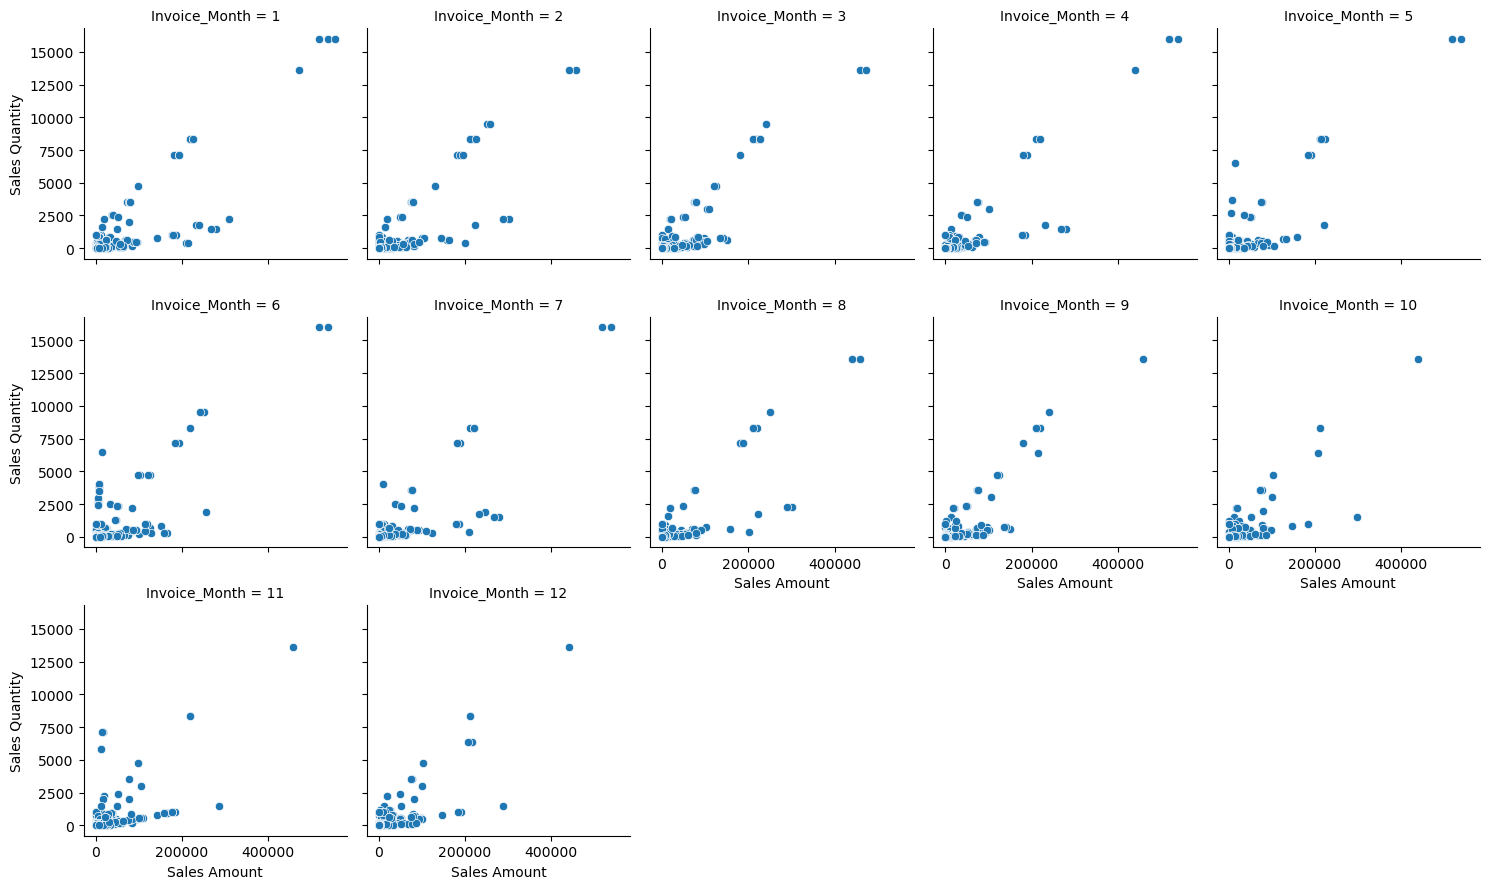

In [55]:
sns.relplot(y = 'Sales Quantity', x = 'Sales Amount', data = sales, height = 3, aspect = 1, col = 'Invoice_Month', col_wrap = 5, palette = 'muted')

,Invoice_Year,Sales Margin Amount
0,2017,37378575.75
1,2018,9147547.74
2,2019,31182301.05


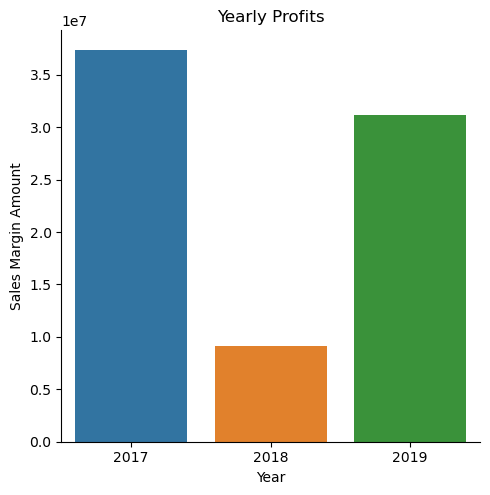

In [56]:
sns.catplot(y = 'Sales Margin Amount', x = 'Invoice_Year', data = yearly_sales, kind = "bar")
plt.xlabel('Year')
plt.ylabel('Sales Margin Amount')
plt.title('Yearly Profits')
yearly_sales[['Invoice_Year', 'Sales Margin Amount']]

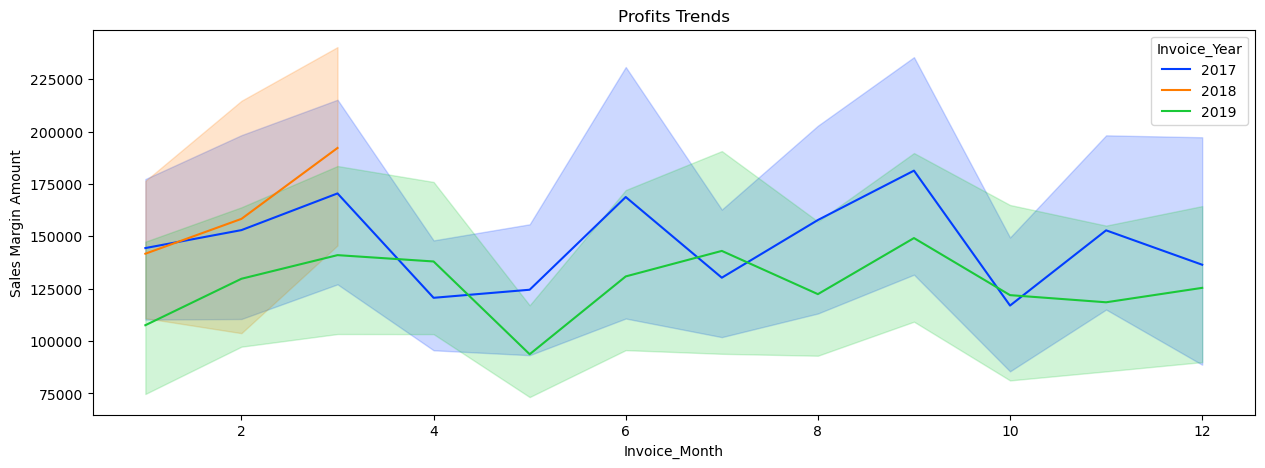

In [57]:
plt.figure(figsize = (15,5))
sns.lineplot(y ='Sales Margin Amount', x = 'Invoice_Month',
             data = sales.groupby(['Invoice Date','Invoice_Year','Invoice_Month']).sum(), hue = 'Invoice_Year', palette='bright')
plt.title('Profits Trends')
plt.show()

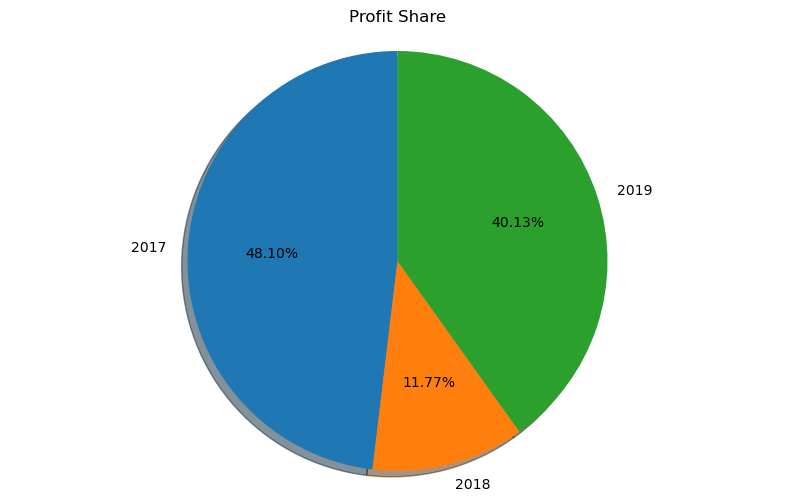

In [58]:
plt.figure(figsize=(10,6))
plt.pie('Sales Margin Amount', labels = 'Invoice_Year', data  = yearly_sales[['Invoice_Year', 'Sales Margin Amount']],
       autopct='%1.2f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.title('Profit Share')
plt.show()

In [64]:
Top10byCustKey17 = sales[sales['Invoice_Year']==2017].groupby(['Invoice_Year','CustKey']).sum()
Top10byCustKey17 = Top10byCustKey17.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

,CustKey,Sales Margin Amount
0,10021485,5176926.16
1,10025024,3250809.87
2,10025052,1761731.21
3,10025919,1415771.68
4,10025241,1267256.40
5,10023023,870216.36
6,10020184,843138.90
7,10009606,835041.55
8,10012715,782863.50
9,10023715,729615.06


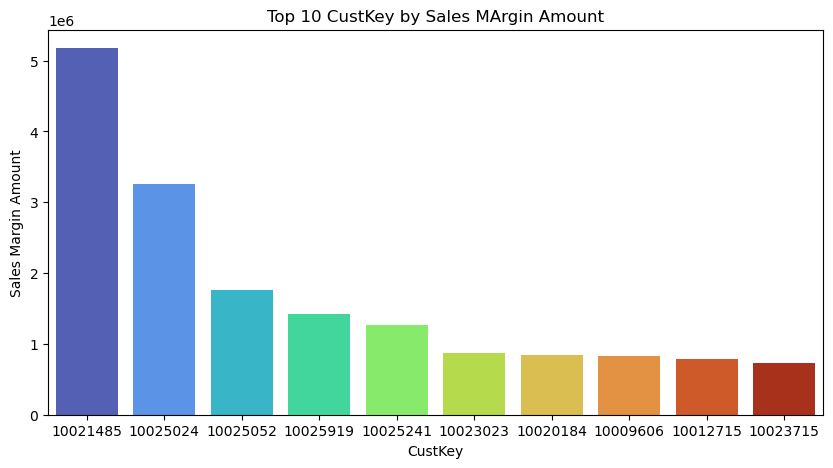

In [69]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'CustKey', y = 'Sales Margin Amount', data = Top10byCustKey17 , palette ='turbo', order = Top10byCustKey17.CustKey)
plt.title('Top 10 CustKey by Sales MArgin Amount')
Top10byCustKey17[['CustKey', 'Sales Margin Amount']]

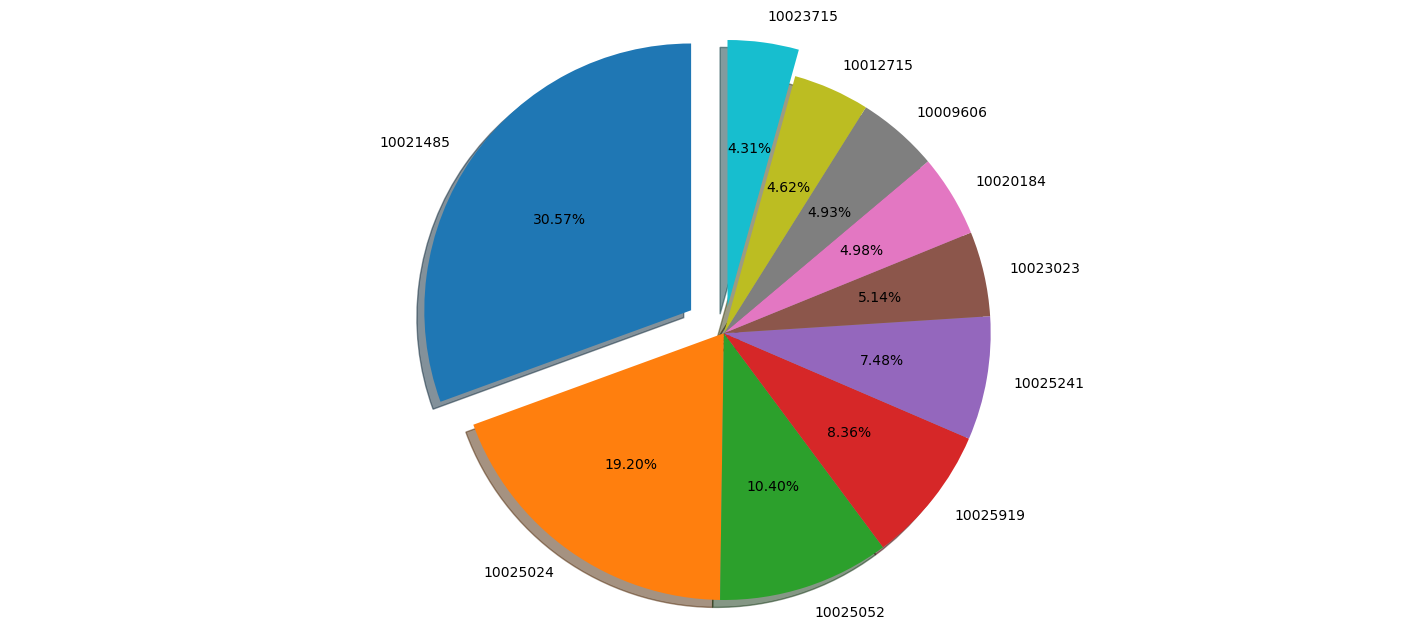

In [70]:
plt.figure(figsize=(18,8))
plt.pie('Sales Margin Amount', labels = 'CustKey', data = Top10byCustKey17,
       autopct = '%1.2f%%', shadow = True, startangle = 90, explode = (0.15,0,0,0,0,0,0,0,0,0.1))
plt.axis('equal')
plt.show()

Observation:

Among the 10 CustKey that generated the most Sales Margin Amount, CustKey-10021485 contributed around 30.57% of the Sales Margin Amount in 2017

In [71]:
Top10byCustKey18 = year_sales[year_sales['Invoice_Year']==2018].groupby(['Invoice_Year','CustKey']).sum()
Top10byCustKey18 = Top10byCustKey18.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

,CustKey,Sales Margin Amount
0,10025039,1398188.29
1,10002154,1154085.14
2,10006919,509760.00
3,10025552,332110.69
4,10017638,233470.15
5,10019066,207997.56
6,10026299,195547.06
7,10023471,195034.39
8,10007183,162898.91
9,10010935,152253.65


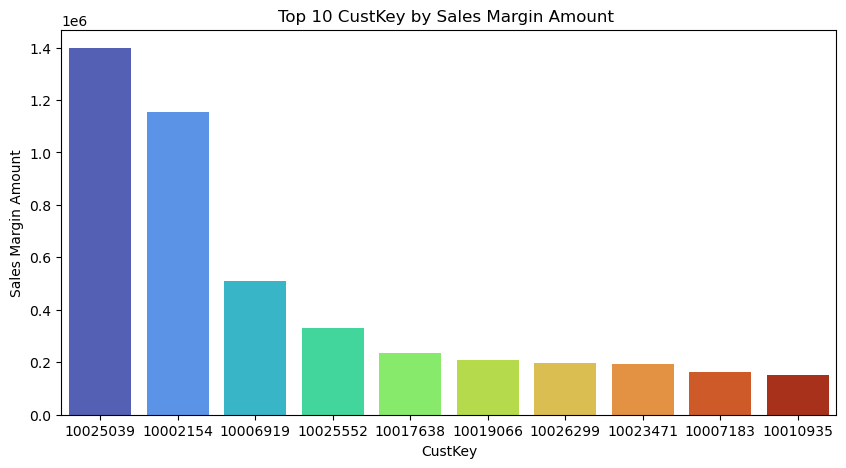

In [72]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'CustKey', y = 'Sales Margin Amount', data = Top10byCustKey18, palette = 'turbo', order = Top10byCustKey18.CustKey)
plt.title('Top 10 CustKey by Sales Margin Amount ')
Top10byCustKey18[['CustKey', 'Sales Margin Amount']]

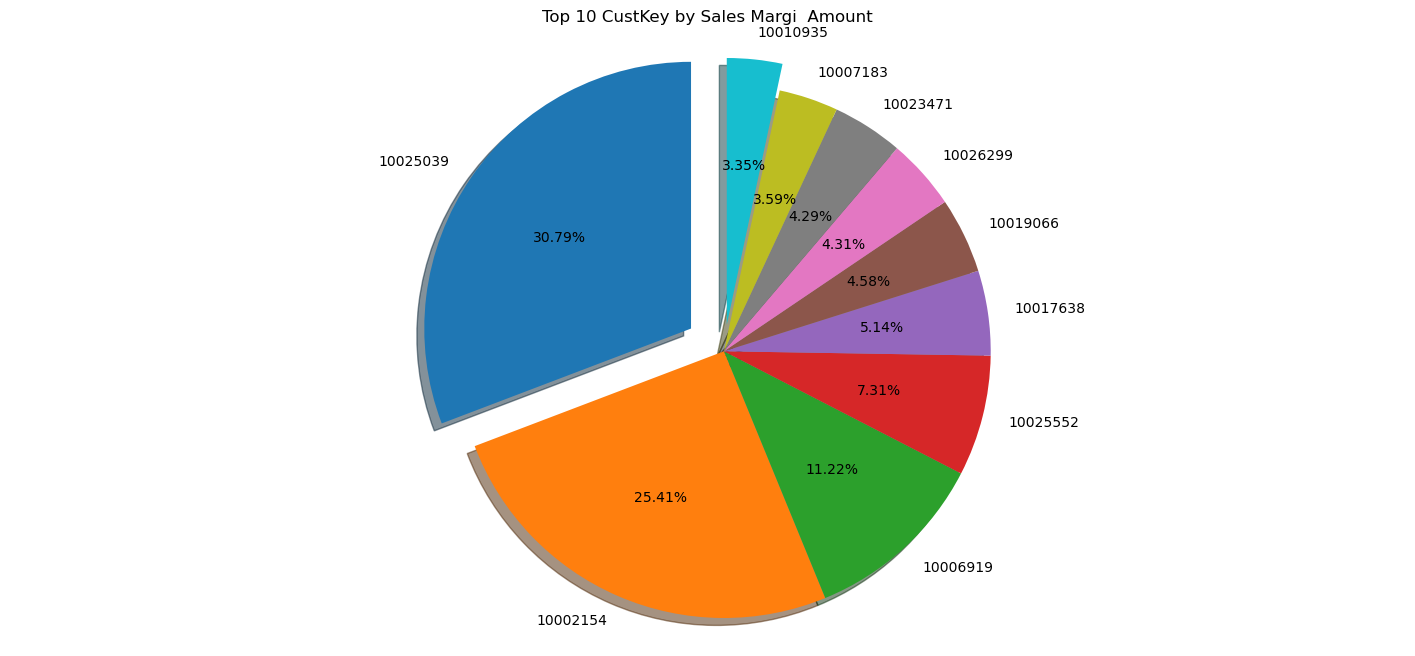

In [73]:
plt.figure(figsize=(18,8))
plt.pie('Sales Margin Amount', labels='CustKey', data = Top10byCustKey18, autopct='%1.2f%%',
       shadow = True, startangle =90, explode = (0.15,0,0,0,0,0,0,0,0,0.1))
plt.axis('equal')
plt.title('Top 10 CustKey by Sales Margi  Amount')
plt.show()

Observation :
Among the 10 CustKey that genrated the most Sales Margin Amount, CustKey-10025039 contributed around 30.79% of the Sales Margin  Amount in 2018

In [74]:
Top10byCustKey19 = year_sales[year_sales['Invoice_Year']==2019].groupby(['Invoice_Year','CustKey']).sum()
Top10byCustKey19 = Top10byCustKey19.sort_values ('Sales Margin Amount',ascending=False).reset_index().head(10)

,CustKey,Sales Margin Amount
0,10009676,4473954.12
1,10021300,2840289.66
2,10025737,1544679.20
3,10019194,1221320.93
4,10025353,1114700.90
5,10025571,798919.82
6,10026606,712503.86
7,10012226,702720.45
8,10016548,683579.49
9,10004245,619735.78


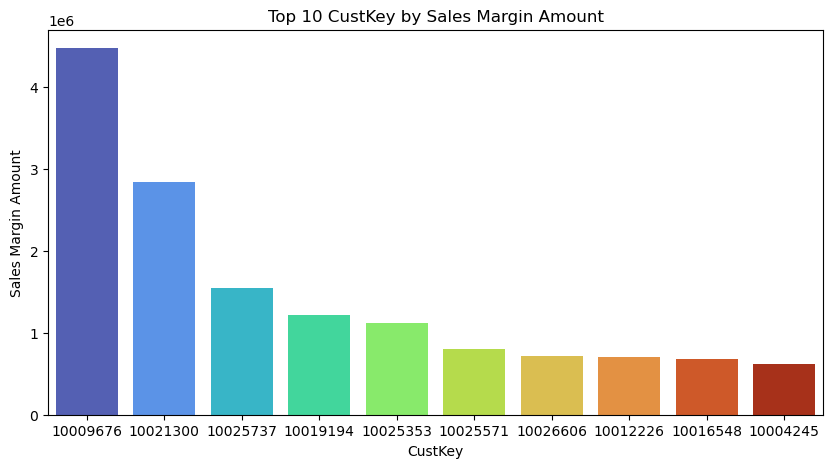

In [75]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'CustKey', y ='Sales Margin Amount', data = Top10byCustKey19, palette = 'turbo', order = Top10byCustKey19.CustKey)
plt.title('Top 10 CustKey by Sales Margin Amount')
Top10byCustKey19[['CustKey', 'Sales Margin Amount']]

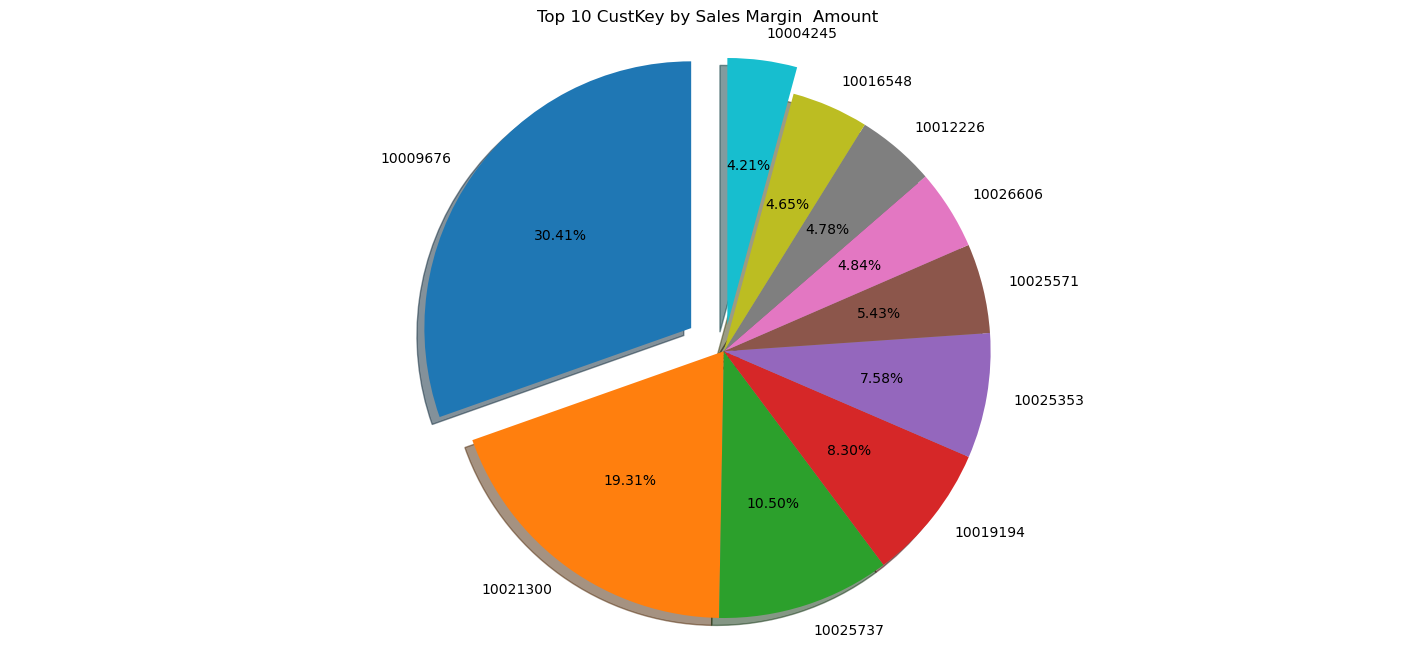

In [76]:
plt.figure(figsize=(18,8))
plt.pie('Sales Margin Amount', labels='CustKey', data = Top10byCustKey19, autopct='%1.2f%%',
       shadow = True, startangle =90, explode = (0.15,0,0,0,0,0,0,0,0,0.1))
plt.axis('equal')
plt.title('Top 10 CustKey by Sales Margin  Amount')
plt.show()

Observation:
Among the 10 CustKey that generated the most Sales Margin Amount, CustKey-10009676 contributed around 30.41% of thw Sales Margin Amount 2019